# 03. 제품 평점 예측 모델 (Rating Prediction)

## 📌 이 노트북의 목적
- 제품의 특성(가격, 브랜드, 카테고리 등)을 보고 평점을 예측하는 머신러닝 모델을 만듭니다
- **회귀(Regression)** 문제: 연속된 숫자 값을 예측합니다 (예: 평점 3.5, 4.2 등)
- 어떤 특성이 평점에 영향을 많이 주는지 분석합니다

## 🎯 학습 목표
1. 회귀 문제 이해하기
2. 데이터를 학습용/테스트용으로 나누기
3. 여러 머신러닝 모델 비교하기
4. 모델 성능 평가하기
5. 특성 중요도 분석하기

---

## 1. 회귀(Regression)란?

### 📖 개념 설명

**회귀**는 연속된 숫자 값을 예측하는 머신러닝 기법입니다.

### 예시로 이해하기:
- **분류(Classification)**: "이 제품이 좋은가? 나쁜가?" (O/X, 범주)
- **회귀(Regression)**: "이 제품의 평점이 몇 점일까?" (3.5점, 4.2점 등 연속된 숫자)

### 우리가 풀 문제:
- **입력(Input)**: 제품의 특성 (가격, 브랜드, 카테고리, 성분 개수 등)
- **출력(Output)**: 예상 평점 (1~5점 사이의 숫자)
- **목표**: 실제 평점과 예측 평점의 차이를 최소화하기

### 실생활 응용:
- 집 가격 예측 (면적, 위치, 방 개수 → 가격)
- 주식 가격 예측 (과거 데이터 → 미래 가격)
- 성적 예측 (공부 시간, 출석률 → 시험 점수)

---

## 2. 라이브러리 임포트

In [1]:
# ============================================================
# 2-1. 기본 라이브러리
# ============================================================

# 데이터 처리
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지 숨기기
import warnings
warnings.filterwarnings('ignore')

# 그래프 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

print("✅ 기본 라이브러리 임포트 완료")

✅ 기본 라이브러리 임포트 완료


In [2]:
# ============================================================
# 2-2. 머신러닝 라이브러리
# ============================================================
# scikit-learn: 파이썬에서 가장 많이 쓰이는 머신러닝 라이브러리

# 데이터 분할
from sklearn.model_selection import train_test_split
# train_test_split: 데이터를 학습용과 테스트용으로 나눔
# 왜 나눌까? 학습한 데이터로 평가하면 부정행위! 본 적 없는 데이터로 평가해야 진짜 성능을 알 수 있음

from sklearn.model_selection import cross_val_score
# cross_val_score: 교차 검증 (더 정확한 성능 평가)

# 전처리
from sklearn.preprocessing import StandardScaler, LabelEncoder
# StandardScaler: 숫자 데이터의 범위를 조정 (평균 0, 표준편차 1로 변환)
# LabelEncoder: 문자를 숫자로 변환 (예: '남자', '여자' → 0, 1)

# 회귀 모델들
from sklearn.linear_model import LinearRegression
# LinearRegression: 선형 회귀 (가장 기본적인 회귀 모델)
# 직선(1차 함수)으로 데이터의 패턴을 학습

from sklearn.ensemble import RandomForestRegressor
# RandomForestRegressor: 랜덤 포레스트 회귀
# 여러 개의 결정 트리를 만들어서 평균을 냄 (더 복잡한 패턴 학습 가능)

from sklearn.ensemble import GradientBoostingRegressor
# GradientBoostingRegressor: 그래디언트 부스팅 회귀
# 이전 모델의 오류를 다음 모델이 보완하는 방식 (고성능)

from xgboost import XGBRegressor
# XGBRegressor: XGBoost (eXtreme Gradient Boosting)
# 그래디언트 부스팅의 개선 버전, 속도가 빠르고 성능이 좋음
# 실제 캐글 대회에서 많이 쓰임

# 성능 평가 지표
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# mean_absolute_error (MAE): 평균 절대 오차 (예측과 실제의 차이를 절대값으로 평균)
# mean_squared_error (MSE): 평균 제곱 오차 (차이를 제곱해서 평균, 큰 오차에 페널티)
# r2_score (R² Score): 결정계수 (모델이 데이터를 얼마나 잘 설명하는지, 0~1 사이)

print("✅ 머신러닝 라이브러리 임포트 완료")
print("\n📚 준비된 모델:")
print("  1. 선형 회귀 (Linear Regression) - 기본 모델")
print("  2. 랜덤 포레스트 (Random Forest) - 중급 모델")
print("  3. 그래디언트 부스팅 (Gradient Boosting) - 고급 모델")
print("  4. XGBoost - 최고 성능 모델")

✅ 머신러닝 라이브러리 임포트 완료

📚 준비된 모델:
  1. 선형 회귀 (Linear Regression) - 기본 모델
  2. 랜덤 포레스트 (Random Forest) - 중급 모델
  3. 그래디언트 부스팅 (Gradient Boosting) - 고급 모델
  4. XGBoost - 최고 성능 모델


---
## 3. 데이터 로드 및 준비

In [3]:
# ============================================================
# 3-1. 전처리된 데이터 로드
# ============================================================

print("📂 전처리된 제품 데이터를 불러오는 중...\n")

# CSV 파일 읽기
products = pd.read_csv('cleaned_products.csv')

print(f"✅ 데이터 로드 완료: {products.shape[0]:,}개 제품, {products.shape[1]}개 컬럼")

# 데이터 미리보기
print("\n📊 데이터 미리보기 (처음 5개):")
print("="*80)
products.head()

📂 전처리된 제품 데이터를 불러오는 중...

✅ 데이터 로드 완료: 8,494개 제품, 30개 컬럼

📊 데이터 미리보기 (처음 5개):


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price,ingredient_count,price_category,popularity_score
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11,NaN,NaN,NaN,...,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN,94,중저가($25-50),6360.0004
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0,13,고가($100+),3880.9994
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0,12,고가($100+),3321.0000
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0,12,고가($100+),3112.0002
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0,12,고가($100+),2733.0004


In [4]:
# ============================================================
# 3-2. 데이터 확인
# ============================================================

print("🔍 데이터 기본 정보:")
print("="*80)
products.info()

print("\n📈 수치형 데이터 통계:")
print("="*80)
products.describe()

🔍 데이터 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8494 non-null   float64
 6   reviews             8494 non-null   int64  
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   bool  

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,child_count,child_max_price,child_min_price,ingredient_count,popularity_score
count,8494.000000,8.494000e+03,8494.000000,8494.000000,8494.000000,451.000000,270.000000,8494.000000,2754.000000,2754.000000,8494.000000,8.494000e+03
mean,5422.440546,2.917957e+04,4.057231,433.865081,51.655595,91.168537,20.207889,1.631622,53.792023,39.665802,31.387685,3.103786e+04
std,1709.595957,6.609212e+04,0.902931,1086.731772,53.669234,79.195631,24.327352,5.379470,58.765894,38.685720,34.262904,6.938359e+04
min,1063.000000,0.000000e+00,0.000000,0.000000,3.000000,0.000000,1.750000,0.000000,3.000000,3.000000,0.000000,0.000000e+00
25%,5333.000000,3.758000e+03,3.925400,22.000000,25.000000,45.000000,8.000000,0.000000,22.000000,19.000000,15.000000,4.098000e+03
50%,6157.500000,9.880000e+03,4.270950,112.000000,35.000000,67.000000,14.000000,0.000000,32.000000,28.000000,25.000000,1.078000e+04
75%,6328.000000,2.684125e+04,4.522500,402.000000,58.000000,108.500000,25.000000,1.000000,59.000000,42.000000,38.000000,2.857325e+04
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,105.000000,570.000000,400.000000,720.000000,1.422535e+06


🔍 평점 분포 확인...

평점이 0인 제품: 278개 (리뷰 없음)
평점이 있는 제품: 8,216개

📊 평점 분포:
count    8216.000000
mean        4.194513
std         0.516694
min         1.000000
25%         3.981725
50%         4.289350
75%         4.530525
max         5.000000
Name: rating, dtype: float64


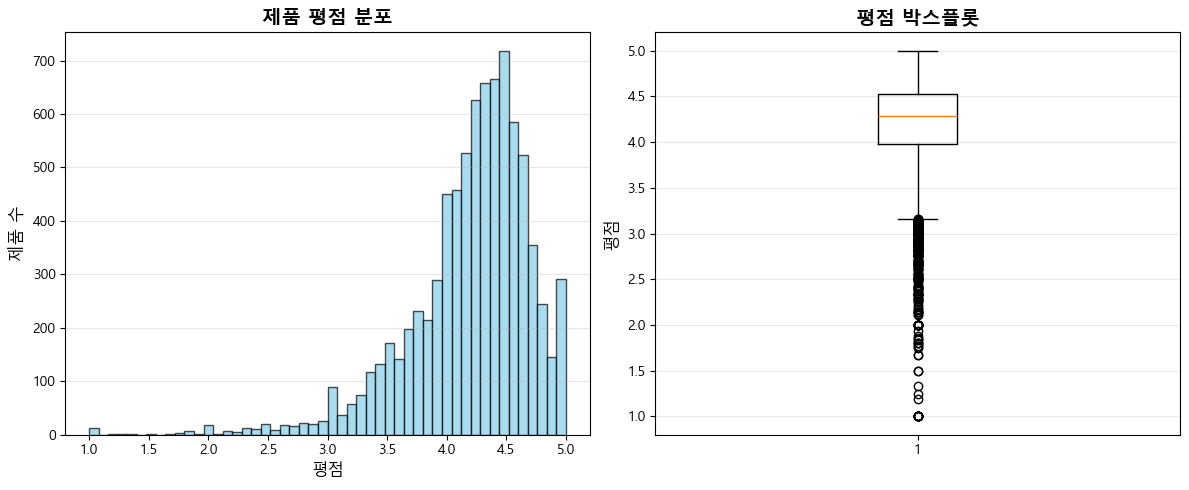


✅ 평점이 있는 제품만 선택 완료!


In [5]:
# ============================================================
# 3-3. 평점이 있는 제품만 선택
# ============================================================
# 평점이 0이면 리뷰가 없다는 뜻이므로 학습에 사용할 수 없음

print("🔍 평점 분포 확인...\n")

# 평점이 0인 제품 수
zero_rating = len(products[products['rating'] == 0])
print(f"평점이 0인 제품: {zero_rating:,}개 (리뷰 없음)")

# 평점이 있는 제품만 선택
# [조건]: 대괄호 안의 조건을 만족하는 행만 선택
products_with_rating = products[products['rating'] > 0].copy()
# .copy(): 원본 데이터를 보호하기 위해 복사본 생성

print(f"평점이 있는 제품: {len(products_with_rating):,}개\n")

print("📊 평점 분포:")
print(products_with_rating['rating'].describe())

# 평점 분포 시각화
plt.figure(figsize=(12, 5))

# 왼쪽: 히스토그램
plt.subplot(1, 2, 1)
plt.hist(products_with_rating['rating'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('제품 평점 분포', fontsize=14, fontweight='bold')
plt.xlabel('평점', fontsize=12)
plt.ylabel('제품 수', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# 오른쪽: 박스플롯
plt.subplot(1, 2, 2)
plt.boxplot(products_with_rating['rating'], vert=True)
plt.title('평점 박스플롯', fontsize=14, fontweight='bold')
plt.ylabel('평점', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ 평점이 있는 제품만 선택 완료!")

---
## 4. 특성(Feature) 선택

### 특성(Feature)이란?
- 모델이 학습할 입력 데이터입니다
- 예측에 도움이 되는 정보를 선택해야 합니다

### 우리가 사용할 특성:
1. **수치형**: price_usd, reviews, loves_count, ingredient_count
2. **범주형**: brand_name, primary_category, secondary_category

### 타겟(Target):
- **rating**: 예측하려는 값 (평점)

In [6]:
# ============================================================
# 4-1. 사용할 특성 선택
# ============================================================

print("🎯 모델 학습에 사용할 특성 선택...\n")

# 수치형 특성 (숫자로 된 데이터)
numeric_features = ['price_usd', 'reviews', 'loves_count']

# ingredient_count가 있으면 추가
if 'ingredient_count' in products_with_rating.columns:
    numeric_features.append('ingredient_count')

# popularity_score가 있으면 추가
if 'popularity_score' in products_with_rating.columns:
    numeric_features.append('popularity_score')

print("📊 수치형 특성:")
for i, feat in enumerate(numeric_features, 1):
    print(f"  {i}. {feat}")

# 범주형 특성 (카테고리로 된 데이터)
categorical_features = ['brand_name', 'primary_category']

# secondary_category가 있으면 추가
if 'secondary_category' in products_with_rating.columns:
    categorical_features.append('secondary_category')

print("\n🏷️ 범주형 특성:")
for i, feat in enumerate(categorical_features, 1):
    print(f"  {i}. {feat}")

# 모든 특성 리스트
all_features = numeric_features + categorical_features

print(f"\n✅ 총 {len(all_features)}개 특성 선택 완료")

🎯 모델 학습에 사용할 특성 선택...

📊 수치형 특성:
  1. price_usd
  2. reviews
  3. loves_count
  4. ingredient_count
  5. popularity_score

🏷️ 범주형 특성:
  1. brand_name
  2. primary_category
  3. secondary_category

✅ 총 8개 특성 선택 완료


In [7]:
# ============================================================
# 4-2. 데이터 준비 (결측값 처리)
# ============================================================
# 선택한 특성 중 결측값이 있는지 확인하고 처리합니다

print("🔍 선택한 특성의 결측값 확인...\n")

# 선택한 특성과 타겟(rating)만 추출
# all_features + ['rating']: 특성들과 타겟을 합친 리스트
data = products_with_rating[all_features + ['rating']].copy()

# 결측값 확인
missing = data.isnull().sum()
missing = missing[missing > 0]  # 결측값이 있는 컬럼만 선택

if len(missing) > 0:
    print("⚠️ 결측값이 있는 컬럼:")
    print(missing)
    print("\n→ 결측값이 있는 행을 제거합니다")
    
    # 결측값이 있는 행 제거
    # .dropna(): 결측값이 있는 행을 삭제
    before_count = len(data)
    data = data.dropna()
    after_count = len(data)
    
    print(f"   제거된 행: {before_count - after_count:,}개")
    print(f"   남은 데이터: {after_count:,}개")
else:
    print("✅ 결측값이 없습니다!")

print(f"\n📊 최종 데이터 크기: {data.shape[0]:,}행 × {data.shape[1]}열")

🔍 선택한 특성의 결측값 확인...

⚠️ 결측값이 있는 컬럼:
secondary_category    7
dtype: int64

→ 결측값이 있는 행을 제거합니다
   제거된 행: 7개
   남은 데이터: 8,209개

📊 최종 데이터 크기: 8,209행 × 9열


---
## 5. 데이터 전처리 (범주형 변수 인코딩)

### 왜 인코딩이 필요할까?
- 머신러닝 모델은 **숫자만** 이해할 수 있습니다
- 브랜드 이름, 카테고리 같은 문자는 숫자로 변환해야 합니다

### 인코딩 방법:
1. **Label Encoding**: 각 카테고리에 숫자를 부여 (0, 1, 2, ...)
   - 예: "Apple" → 0, "Samsung" → 1, "LG" → 2
   - 간단하지만, 순서가 없는 데이터에는 부적합할 수 있음

2. **One-Hot Encoding**: 각 카테고리를 별도의 컬럼으로 만듦
   - 예: brand_Apple, brand_Samsung, brand_LG (0 또는 1)
   - 더 정확하지만 컬럼 수가 많아짐

우리는 **Label Encoding**을 사용하겠습니다 (간단하고 빠름)

In [8]:
# ============================================================
# 5-1. 범주형 변수를 숫자로 변환 (Label Encoding)
# ============================================================

print("🔄 범주형 변수를 숫자로 변환하는 중...\n")

# 변환 정보를 저장할 딕셔너리
# 나중에 어떤 숫자가 어떤 브랜드인지 알 수 있도록 저장
label_encoders = {}

# 각 범주형 특성에 대해 반복
for feature in categorical_features:
    print(f"처리 중: {feature}")
    
    # LabelEncoder 객체 생성
    le = LabelEncoder()
    
    # 문자를 숫자로 변환
    # .fit_transform(): 학습하고 변환하기
    # 1. fit: 어떤 카테고리들이 있는지 학습
    # 2. transform: 각 카테고리를 숫자로 변환
    data[feature] = le.fit_transform(data[feature].astype(str))
    
    # 나중에 사용하기 위해 저장
    label_encoders[feature] = le
    
    # 고유한 값의 개수 출력
    n_categories = len(le.classes_)
    print(f"  → {n_categories}개 카테고리를 0~{n_categories-1} 숫자로 변환")
    
    # 예시 출력 (처음 5개)
    print(f"  예시: {list(le.classes_[:5])} → {list(range(5))}")
    print()

print("✅ 모든 범주형 변수를 숫자로 변환 완료!")

🔄 범주형 변수를 숫자로 변환하는 중...

처리 중: brand_name
  → 302개 카테고리를 0~301 숫자로 변환
  예시: ['19-69', '54 Thrones', 'ABBOTT', 'AERIN', 'ALTERNA Haircare'] → [0, 1, 2, 3, 4]

처리 중: primary_category
  → 8개 카테고리를 0~7 숫자로 변환
  예시: ['Bath & Body', 'Fragrance', 'Hair', 'Makeup', 'Men'] → [0, 1, 2, 3, 4]

처리 중: secondary_category
  → 41개 카테고리를 0~40 숫자로 변환
  예시: ['Accessories', 'Bath & Body', 'Bath & Shower', 'Beauty Accessories', 'Beauty Supplements'] → [0, 1, 2, 3, 4]

✅ 모든 범주형 변수를 숫자로 변환 완료!


In [9]:
# ============================================================
# 5-2. 변환된 데이터 확인
# ============================================================

print("📊 변환된 데이터 확인:")
print("="*80)
print(data.head())

print("\n📈 데이터 타입 확인:")
print("="*80)
print(data.dtypes)

# 이제 모든 데이터가 숫자형이어야 합니다
if data.select_dtypes(include=['object']).shape[1] == 0:
    print("\n✅ 모든 데이터가 숫자형으로 변환되었습니다!")
else:
    print("\n⚠️ 아직 문자형 데이터가 남아있습니다")

📊 변환된 데이터 확인:
   price_usd  reviews  loves_count  ingredient_count  popularity_score  \
0       35.0       11         6320                94         6360.0004   
1      195.0       13         3827                13         3880.9994   
2      195.0       16         3253                12         3321.0000   
3      195.0       21         3018                12         3112.0002   
4      195.0       13         2691                12         2733.0004   

   brand_name  primary_category  secondary_category  rating  
0           0                 1                  38  3.6364  
1           0                 1                  40  4.1538  
2           0                 1                  40  4.2500  
3           0                 1                  40  4.4762  
4           0                 1                  40  3.2308  

📈 데이터 타입 확인:
price_usd             float64
reviews                 int64
loves_count             int64
ingredient_count        int64
popularity_score      float64
brand

---
## 6. 학습 데이터와 테스트 데이터 분할

### 왜 데이터를 나눌까?

#### 비유로 이해하기:
- **학습 데이터**: 학생이 공부하는 교과서 📚
- **테스트 데이터**: 시험 문제 📝

교과서 문제로 시험을 보면? → 부정행위! 진짜 실력을 알 수 없음  
본 적 없는 문제로 시험을 봐야 → 진짜 실력을 알 수 있음

### 일반적인 분할 비율:
- **학습 데이터 80%**: 모델이 패턴을 학습하는데 사용
- **테스트 데이터 20%**: 모델의 실제 성능을 평가하는데 사용

### 주의사항:
- 테스트 데이터는 모델 학습에 **절대** 사용하면 안 됩니다
- 테스트 데이터로 평가한 결과만 진짜 성능입니다

In [10]:
# ============================================================
# 6-1. 특성(X)과 타겟(y) 분리
# ============================================================

print("🎯 데이터를 특성(X)과 타겟(y)으로 분리...\n")

# X: 입력 데이터 (특성들)
# rating을 제외한 모든 컬럼
# .drop('rating', axis=1): rating 컬럼을 제거
# axis=1은 열(컬럼)을 의미 (axis=0은 행)
X = data.drop('rating', axis=1)

# y: 정답 데이터 (타겟)
# rating 컬럼만 선택
y = data['rating']

print(f"✅ 특성(X) 크기: {X.shape} (행 × 열)")
print(f"   → {X.shape[0]:,}개 데이터, {X.shape[1]}개 특성")

print(f"\n✅ 타겟(y) 크기: {y.shape}")
print(f"   → {len(y):,}개 정답 값")

print("\n📋 특성 목록:")
for i, col in enumerate(X.columns, 1):
    print(f"  {i}. {col}")

🎯 데이터를 특성(X)과 타겟(y)으로 분리...

✅ 특성(X) 크기: (8209, 8) (행 × 열)
   → 8,209개 데이터, 8개 특성

✅ 타겟(y) 크기: (8209,)
   → 8,209개 정답 값

📋 특성 목록:
  1. price_usd
  2. reviews
  3. loves_count
  4. ingredient_count
  5. popularity_score
  6. brand_name
  7. primary_category
  8. secondary_category


In [11]:
# ============================================================
# 6-2. 학습/테스트 데이터 분할
# ============================================================

print("✂️ 데이터를 학습용(80%)과 테스트용(20%)으로 나누는 중...\n")

# train_test_split(): 데이터를 무작위로 섞어서 나눔
# test_size=0.2: 테스트 데이터 20%
# random_state=42: 랜덤 시드 (같은 숫자를 쓰면 항상 같은 결과)
#                  42는 관습적으로 많이 사용하는 숫자 (특별한 의미는 없음)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20%를 테스트용으로
    random_state=42     # 재현 가능하도록 시드 고정
)

print("📊 데이터 분할 결과:")
print("="*80)
print(f"전체 데이터: {len(X):,}개")
print()
print(f"학습 데이터 (X_train, y_train):")
print(f"  - X_train: {X_train.shape} → {X_train.shape[0]:,}개 데이터")
print(f"  - y_train: {y_train.shape} → {len(y_train):,}개 정답")
print(f"  - 비율: {len(X_train)/len(X)*100:.1f}%")
print()
print(f"테스트 데이터 (X_test, y_test):")
print(f"  - X_test: {X_test.shape} → {X_test.shape[0]:,}개 데이터")
print(f"  - y_test: {y_test.shape} → {len(y_test):,}개 정답")
print(f"  - 비율: {len(X_test)/len(X)*100:.1f}%")

print("\n✅ 데이터 분할 완료!")
print("\n💡 중요:")
print("  - 학습 데이터: 모델이 패턴을 배우는데 사용")
print("  - 테스트 데이터: 모델의 실제 성능을 평가 (학습에 사용 금지!)")

✂️ 데이터를 학습용(80%)과 테스트용(20%)으로 나누는 중...

📊 데이터 분할 결과:
전체 데이터: 8,209개

학습 데이터 (X_train, y_train):
  - X_train: (6567, 8) → 6,567개 데이터
  - y_train: (6567,) → 6,567개 정답
  - 비율: 80.0%

테스트 데이터 (X_test, y_test):
  - X_test: (1642, 8) → 1,642개 데이터
  - y_test: (1642,) → 1,642개 정답
  - 비율: 20.0%

✅ 데이터 분할 완료!

💡 중요:
  - 학습 데이터: 모델이 패턴을 배우는데 사용
  - 테스트 데이터: 모델의 실제 성능을 평가 (학습에 사용 금지!)


---
## 7. 특성 스케일링 (Feature Scaling)

### 스케일링이란?
- 서로 다른 범위를 가진 특성들을 비슷한 범위로 조정하는 것입니다

### 왜 필요할까?

#### 예시:
- **가격**: 10 ~ 500 (범위가 큼)
- **평점**: 1 ~ 5 (범위가 작음)

모델은 숫자가 큰 특성(가격)에 더 집중하게 됩니다  
→ 평점 같은 중요한 정보를 놓칠 수 있음

### StandardScaler:
- 각 특성을 평균 0, 표준편차 1로 변환
- 공식: (값 - 평균) / 표준편차
- 결과: 대부분의 값이 -3 ~ 3 사이에 분포

### 주의:
- 학습 데이터로 스케일러를 학습(fit)하고
- 같은 스케일러로 테스트 데이터를 변환(transform)합니다
- 테스트 데이터로 fit하면 안 됩니다! (정보 유출)

In [12]:
# ============================================================
# 7-1. 스케일링 전 데이터 분포 확인
# ============================================================

print("📊 스케일링 전 수치형 특성의 범위:")
print("="*80)

# 수치형 특성만 선택해서 통계 확인
for feature in numeric_features:
    if feature in X_train.columns:
        min_val = X_train[feature].min()
        max_val = X_train[feature].max()
        mean_val = X_train[feature].mean()
        std_val = X_train[feature].std()
        
        print(f"{feature}:")
        print(f"  범위: {min_val:.2f} ~ {max_val:.2f}")
        print(f"  평균: {mean_val:.2f}, 표준편차: {std_val:.2f}")
        print()

print("→ 특성들의 범위가 서로 다릅니다. 스케일링이 필요합니다!")

📊 스케일링 전 수치형 특성의 범위:
price_usd:
  범위: 3.00 ~ 465.00
  평균: 51.47, 표준편차: 50.36

reviews:
  범위: 1.00 ~ 21281.00
  평균: 438.62, 표준편차: 1073.63

loves_count:
  범위: 0.00 ~ 1401068.00
  평균: 29944.73, 표준편차: 66655.44

ingredient_count:
  범위: 0.00 ~ 720.00
  평균: 31.63, 표준편차: 35.26

popularity_score:
  범위: 9.00 ~ 1422534.99
  평균: 31822.13, 표준편차: 69889.29

→ 특성들의 범위가 서로 다릅니다. 스케일링이 필요합니다!


In [13]:
# ============================================================
# 7-2. StandardScaler로 스케일링
# ============================================================

print("🔄 StandardScaler로 특성 스케일링 중...\n")

# StandardScaler 객체 생성
scaler = StandardScaler()

# 학습 데이터로 스케일러 학습 (평균과 표준편차 계산)
# .fit(): 데이터의 통계량(평균, 표준편차)을 계산해서 기억
scaler.fit(X_train)

print("✅ 학습 데이터로 스케일러 학습 완료")
print(f"   계산된 평균: {scaler.mean_[:3]}... (처음 3개만 표시)")
print(f"   계산된 표준편차: {scaler.scale_[:3]}... (처음 3개만 표시)")

# 학습 데이터 변환
# .transform(): 학습한 통계량으로 데이터를 변환
X_train_scaled = scaler.transform(X_train)

# 테스트 데이터 변환 (같은 스케일러 사용!)
# 주의: 테스트 데이터는 fit하지 않고 transform만!
X_test_scaled = scaler.transform(X_test)

print("\n✅ 데이터 스케일링 완료!")
print(f"   X_train_scaled: {X_train_scaled.shape}")
print(f"   X_test_scaled: {X_test_scaled.shape}")

🔄 StandardScaler로 특성 스케일링 중...

✅ 학습 데이터로 스케일러 학습 완료
   계산된 평균: [   51.46924471   438.61824273 29944.73351607]... (처음 3개만 표시)
   계산된 표준편차: [5.03515009e+01 1.07354826e+03 6.66503630e+04]... (처음 3개만 표시)

✅ 데이터 스케일링 완료!
   X_train_scaled: (6567, 8)
   X_test_scaled: (1642, 8)


In [14]:
# ============================================================
# 7-3. 스케일링 후 데이터 분포 확인
# ============================================================

print("📊 스케일링 후 데이터 범위:")
print("="*80)

# 첫 3개 특성만 확인
for i in range(min(3, X_train_scaled.shape[1])):
    min_val = X_train_scaled[:, i].min()
    max_val = X_train_scaled[:, i].max()
    mean_val = X_train_scaled[:, i].mean()
    std_val = X_train_scaled[:, i].std()
    
    print(f"특성 {i+1}:")
    print(f"  범위: {min_val:.2f} ~ {max_val:.2f}")
    print(f"  평균: {mean_val:.2f}, 표준편차: {std_val:.2f}")
    print()

print("→ 평균이 0에 가깝고, 표준편차가 1에 가까워졌습니다!")
print("→ 이제 모든 특성이 비슷한 범위를 가집니다.")

📊 스케일링 후 데이터 범위:
특성 1:
  범위: -0.96 ~ 8.21
  평균: -0.00, 표준편차: 1.00

특성 2:
  범위: -0.41 ~ 19.41
  평균: -0.00, 표준편차: 1.00

특성 3:
  범위: -0.45 ~ 20.57
  평균: -0.00, 표준편차: 1.00

→ 평균이 0에 가깝고, 표준편차가 1에 가까워졌습니다!
→ 이제 모든 특성이 비슷한 범위를 가집니다.


---
## 8. 모델 학습 및 평가

### 사용할 모델들:

#### 1. 선형 회귀 (Linear Regression)
- **원리**: 데이터를 직선으로 표현
- **장점**: 간단하고 빠름, 해석하기 쉬움
- **단점**: 복잡한 패턴은 학습 못함
- **비유**: 자로 그은 직선

#### 2. 랜덤 포레스트 (Random Forest)
- **원리**: 여러 개의 결정 트리를 만들어서 평균
- **장점**: 복잡한 패턴 학습 가능, 과적합 방지
- **단점**: 학습 시간이 오래 걸림
- **비유**: 여러 사람의 의견을 종합

#### 3. 그래디언트 부스팅 (Gradient Boosting)
- **원리**: 이전 모델의 오류를 다음 모델이 보완
- **장점**: 높은 성능
- **단점**: 학습 시간이 오래 걸림, 과적합 위험
- **비유**: 시험을 보고 틀린 문제를 집중 공부

#### 4. XGBoost
- **원리**: 그래디언트 부스팅의 개선 버전
- **장점**: 매우 높은 성능, 빠른 속도
- **단점**: 하이퍼파라미터 튜닝이 복잡
- **비유**: 프로 선수급 실력

### 평가 지표:
- **MAE (Mean Absolute Error)**: 평균 절대 오차 - 작을수록 좋음
- **RMSE (Root Mean Squared Error)**: 평균 제곱근 오차 - 작을수록 좋음
- **R² Score**: 결정계수 - 1에 가까울수록 좋음 (0~1)

In [15]:
# ============================================================
# 8-1. 모델 성능 평가 함수 정의
# ============================================================
# 각 모델의 성능을 일관되게 평가하기 위한 함수

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    모델을 학습하고 평가하는 함수
    
    Parameters:
    -----------
    model : 머신러닝 모델 객체
    X_train, X_test : 학습/테스트 특성 데이터
    y_train, y_test : 학습/테스트 타겟 데이터
    model_name : 모델 이름 (출력용)
    
    Returns:
    --------
    results : 평가 결과가 담긴 딕셔너리
    """
    
    print(f"\n{'='*80}")
    print(f"🤖 {model_name} 학습 중...")
    print(f"{'='*80}")
    
    # 모델 학습
    # .fit(): 학습 데이터로 모델을 학습
    # X_train으로 패턴을 배우고, y_train을 정답으로 사용
    model.fit(X_train, y_train)
    print("✅ 학습 완료!\n")
    
    # 예측
    # .predict(): 학습한 모델로 예측
    y_train_pred = model.predict(X_train)  # 학습 데이터로 예측
    y_test_pred = model.predict(X_test)    # 테스트 데이터로 예측
    
    # 평가 지표 계산
    # 학습 데이터 성능
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    
    # 테스트 데이터 성능
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)
    
    # 결과 출력
    print("📊 학습 데이터 성능:")
    print(f"   MAE  : {train_mae:.4f} (평균적으로 {train_mae:.4f}점 차이)")
    print(f"   RMSE : {train_rmse:.4f}")
    print(f"   R²   : {train_r2:.4f} ({train_r2*100:.2f}% 설명력)")
    
    print("\n📊 테스트 데이터 성능: (진짜 성능!)")
    print(f"   MAE  : {test_mae:.4f} (평균적으로 {test_mae:.4f}점 차이)")
    print(f"   RMSE : {test_rmse:.4f}")
    print(f"   R²   : {test_r2:.4f} ({test_r2*100:.2f}% 설명력)")
    
    # 과적합 체크
    if train_r2 - test_r2 > 0.1:
        print("\n⚠️ 과적합(Overfitting) 가능성:")
        print("   학습 데이터 성능이 테스트 데이터보다 너무 좋습니다.")
        print("   → 모델이 학습 데이터를 외웠을 가능성이 있습니다.")
    else:
        print("\n✅ 과적합 없음: 학습과 테스트 성능이 비슷합니다.")
    
    # 결과를 딕셔너리로 반환
    results = {
        'model_name': model_name,
        'model': model,
        'train_mae': train_mae,
        'train_rmse': train_rmse,
        'train_r2': train_r2,
        'test_mae': test_mae,
        'test_rmse': test_rmse,
        'test_r2': test_r2,
        'y_test_pred': y_test_pred
    }
    
    return results

print("✅ 평가 함수 정의 완료")

✅ 평가 함수 정의 완료


In [16]:
# ============================================================
# 8-2. 모델 1 - 선형 회귀 (Linear Regression)
# ============================================================

print("\n" + "#"*80)
print("# 모델 1: 선형 회귀 (Linear Regression)")
print("#"*80)
print("\n📖 선형 회귀란?")
print("   가장 기본적인 회귀 모델로, 데이터를 하나의 직선으로 표현합니다.")
print("   공식: y = w1*x1 + w2*x2 + ... + b")
print("   (w: 가중치, b: 편향)")

# 선형 회귀 모델 생성
lr_model = LinearRegression()

# 모델 학습 및 평가
lr_results = evaluate_model(
    model=lr_model,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    model_name="선형 회귀 (Linear Regression)"
)


################################################################################
# 모델 1: 선형 회귀 (Linear Regression)
################################################################################

📖 선형 회귀란?
   가장 기본적인 회귀 모델로, 데이터를 하나의 직선으로 표현합니다.
   공식: y = w1*x1 + w2*x2 + ... + b
   (w: 가중치, b: 편향)

🤖 선형 회귀 (Linear Regression) 학습 중...
✅ 학습 완료!

📊 학습 데이터 성능:
   MAE  : 0.3546 (평균적으로 0.3546점 차이)
   RMSE : 0.5023
   R²   : 0.0754 (7.54% 설명력)

📊 테스트 데이터 성능: (진짜 성능!)
   MAE  : 0.3357 (평균적으로 0.3357점 차이)
   RMSE : 0.4772
   R²   : 0.0648 (6.48% 설명력)

✅ 과적합 없음: 학습과 테스트 성능이 비슷합니다.


In [17]:
# ============================================================
# 8-3. 모델 2 - 랜덤 포레스트 (Random Forest)
# ============================================================

print("\n" + "#"*80)
print("# 모델 2: 랜덤 포레스트 (Random Forest)")
print("#"*80)
print("\n📖 랜덤 포레스트란?")
print("   여러 개의 결정 트리(Decision Tree)를 만들어서 그 결과를 평균냅니다.")
print("   '숲(Forest)'처럼 많은 나무(Tree)를 사용한다고 해서 붙은 이름입니다.")
print("   복잡한 패턴도 학습할 수 있습니다.")

# 랜덤 포레스트 모델 생성
# n_estimators=100: 100개의 트리를 만듦
# random_state=42: 재현 가능하도록 시드 고정
# n_jobs=-1: 모든 CPU 코어를 사용 (빠른 학습)
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# 모델 학습 및 평가
rf_results = evaluate_model(
    model=rf_model,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    model_name="랜덤 포레스트 (Random Forest)"
)


################################################################################
# 모델 2: 랜덤 포레스트 (Random Forest)
################################################################################

📖 랜덤 포레스트란?
   여러 개의 결정 트리(Decision Tree)를 만들어서 그 결과를 평균냅니다.
   '숲(Forest)'처럼 많은 나무(Tree)를 사용한다고 해서 붙은 이름입니다.
   복잡한 패턴도 학습할 수 있습니다.

🤖 랜덤 포레스트 (Random Forest) 학습 중...
✅ 학습 완료!

📊 학습 데이터 성능:
   MAE  : 0.1288 (평균적으로 0.1288점 차이)
   RMSE : 0.1822
   R²   : 0.8783 (87.83% 설명력)

📊 테스트 데이터 성능: (진짜 성능!)
   MAE  : 0.3312 (평균적으로 0.3312점 차이)
   RMSE : 0.4600
   R²   : 0.1309 (13.09% 설명력)

⚠️ 과적합(Overfitting) 가능성:
   학습 데이터 성능이 테스트 데이터보다 너무 좋습니다.
   → 모델이 학습 데이터를 외웠을 가능성이 있습니다.


In [18]:
# ============================================================
# 8-4. 모델 3 - 그래디언트 부스팅 (Gradient Boosting)
# ============================================================

print("\n" + "#"*80)
print("# 모델 3: 그래디언트 부스팅 (Gradient Boosting)")
print("#"*80)
print("\n📖 그래디언트 부스팅이란?")
print("   약한 모델들을 순차적으로 학습시키면서,")
print("   이전 모델이 틀린 부분을 다음 모델이 집중적으로 학습합니다.")
print("   시험에서 틀린 문제를 중점적으로 공부하는 것과 비슷합니다.")

# 그래디언트 부스팅 모델 생성
# n_estimators=100: 100개의 약한 모델을 순차적으로 학습
# learning_rate=0.1: 학습 속도 (너무 크면 불안정, 너무 작으면 느림)
# max_depth=3: 각 트리의 최대 깊이
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# 모델 학습 및 평가
gb_results = evaluate_model(
    model=gb_model,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    model_name="그래디언트 부스팅 (Gradient Boosting)"
)


################################################################################
# 모델 3: 그래디언트 부스팅 (Gradient Boosting)
################################################################################

📖 그래디언트 부스팅이란?
   약한 모델들을 순차적으로 학습시키면서,
   이전 모델이 틀린 부분을 다음 모델이 집중적으로 학습합니다.
   시험에서 틀린 문제를 중점적으로 공부하는 것과 비슷합니다.

🤖 그래디언트 부스팅 (Gradient Boosting) 학습 중...
✅ 학습 완료!

📊 학습 데이터 성능:
   MAE  : 0.3332 (평균적으로 0.3332점 차이)
   RMSE : 0.4561
   R²   : 0.2377 (23.77% 설명력)

📊 테스트 데이터 성능: (진짜 성능!)
   MAE  : 0.3279 (평균적으로 0.3279점 차이)
   RMSE : 0.4528
   R²   : 0.1579 (15.79% 설명력)

✅ 과적합 없음: 학습과 테스트 성능이 비슷합니다.


In [19]:
# ============================================================
# 8-5. 모델 4 - XGBoost
# ============================================================

print("\n" + "#"*80)
print("# 모델 4: XGBoost (eXtreme Gradient Boosting)")
print("#"*80)
print("\n📖 XGBoost란?")
print("   그래디언트 부스팅의 개선 버전으로,")
print("   더 빠르고 성능이 좋습니다.")
print("   캐글(Kaggle) 같은 데이터 과학 대회에서 많이 사용됩니다.")

# XGBoost 모델 생성
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    n_jobs=-1
)

# 모델 학습 및 평가
xgb_results = evaluate_model(
    model=xgb_model,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    model_name="XGBoost"
)


################################################################################
# 모델 4: XGBoost (eXtreme Gradient Boosting)
################################################################################

📖 XGBoost란?
   그래디언트 부스팅의 개선 버전으로,
   더 빠르고 성능이 좋습니다.
   캐글(Kaggle) 같은 데이터 과학 대회에서 많이 사용됩니다.

🤖 XGBoost 학습 중...
✅ 학습 완료!

📊 학습 데이터 성능:
   MAE  : 0.3346 (평균적으로 0.3346점 차이)
   RMSE : 0.4607
   R²   : 0.2221 (22.21% 설명력)

📊 테스트 데이터 성능: (진짜 성능!)
   MAE  : 0.3257 (평균적으로 0.3257점 차이)
   RMSE : 0.4494
   R²   : 0.1705 (17.05% 설명력)

✅ 과적합 없음: 학습과 테스트 성능이 비슷합니다.


---
## 9. 모델 비교 및 최종 선택

In [20]:
# ============================================================
# 9-1. 모든 모델의 성능 비교표 생성
# ============================================================

print("\n" + "="*80)
print("📊 모든 모델 성능 비교")
print("="*80 + "\n")

# 모든 결과를 하나의 데이터프레임으로 정리
comparison = pd.DataFrame([
    {
        '모델': lr_results['model_name'],
        'Test MAE': lr_results['test_mae'],
        'Test RMSE': lr_results['test_rmse'],
        'Test R²': lr_results['test_r2']
    },
    {
        '모델': rf_results['model_name'],
        'Test MAE': rf_results['test_mae'],
        'Test RMSE': rf_results['test_rmse'],
        'Test R²': rf_results['test_r2']
    },
    {
        '모델': gb_results['model_name'],
        'Test MAE': gb_results['test_mae'],
        'Test RMSE': gb_results['test_rmse'],
        'Test R²': gb_results['test_r2']
    },
    {
        '모델': xgb_results['model_name'],
        'Test MAE': xgb_results['test_mae'],
        'Test RMSE': xgb_results['test_rmse'],
        'Test R²': xgb_results['test_r2']
    }
])

# R² 기준으로 내림차순 정렬 (높을수록 좋음)
comparison = comparison.sort_values('Test R²', ascending=False)

print(comparison.to_string(index=False))

# 최고 성능 모델 찾기
best_model_name = comparison.iloc[0]['모델']
best_r2 = comparison.iloc[0]['Test R²']

print("\n" + "="*80)
print(f"🏆 최고 성능 모델: {best_model_name}")
print(f"   R² Score: {best_r2:.4f} ({best_r2*100:.2f}% 설명력)")
print("="*80)

print("\n💡 평가 지표 해석:")
print("   MAE (Mean Absolute Error):")
print("     → 예측값과 실제값의 평균 차이")
print("     → 작을수록 좋음 (0에 가까울수록 완벽)")
print("\n   RMSE (Root Mean Squared Error):")
print("     → MAE와 비슷하지만 큰 오차에 더 큰 페널티")
print("     → 작을수록 좋음")
print("\n   R² Score (결정계수):")
print("     → 모델이 데이터를 얼마나 잘 설명하는지")
print("     → 0~1 사이 값, 1에 가까울수록 좋음")
print("     → 예: 0.8 = 80% 설명력 (변동의 80%를 모델이 설명)")


📊 모든 모델 성능 비교

                           모델  Test MAE  Test RMSE  Test R²
                      XGBoost  0.325698   0.449416 0.170472
그래디언트 부스팅 (Gradient Boosting)  0.327919   0.452798 0.157941
      랜덤 포레스트 (Random Forest)  0.331235   0.460011 0.130898
    선형 회귀 (Linear Regression)  0.335695   0.477180 0.064813

🏆 최고 성능 모델: XGBoost
   R² Score: 0.1705 (17.05% 설명력)

💡 평가 지표 해석:
   MAE (Mean Absolute Error):
     → 예측값과 실제값의 평균 차이
     → 작을수록 좋음 (0에 가까울수록 완벽)

   RMSE (Root Mean Squared Error):
     → MAE와 비슷하지만 큰 오차에 더 큰 페널티
     → 작을수록 좋음

   R² Score (결정계수):
     → 모델이 데이터를 얼마나 잘 설명하는지
     → 0~1 사이 값, 1에 가까울수록 좋음
     → 예: 0.8 = 80% 설명력 (변동의 80%를 모델이 설명)


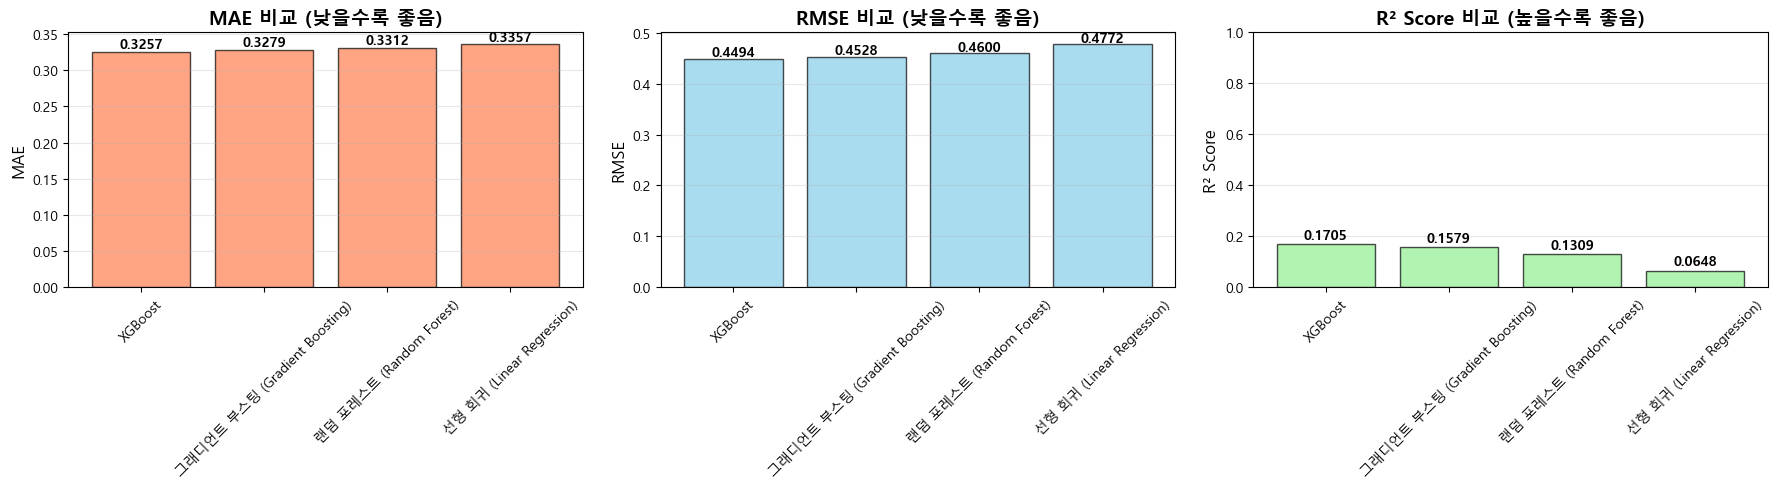


📊 그래프 설명:
   왼쪽/가운데: MAE와 RMSE는 낮을수록 좋습니다 (오차가 작다는 의미)
   오른쪽: R²는 높을수록 좋습니다 (설명력이 높다는 의미)


In [21]:
# ============================================================
# 9-2. 모델 성능 시각화
# ============================================================

# 그래프 크기 설정
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. MAE 비교
axes[0].bar(comparison['모델'], comparison['Test MAE'], color='coral', alpha=0.7, edgecolor='black')
axes[0].set_title('MAE 비교 (낮을수록 좋음)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('MAE', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# 각 막대 위에 값 표시
for i, (model, mae) in enumerate(zip(comparison['모델'], comparison['Test MAE'])):
    axes[0].text(i, mae + 0.005, f'{mae:.4f}', ha='center', fontsize=10, fontweight='bold')

# 2. RMSE 비교
axes[1].bar(comparison['모델'], comparison['Test RMSE'], color='skyblue', alpha=0.7, edgecolor='black')
axes[1].set_title('RMSE 비교 (낮을수록 좋음)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('RMSE', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

for i, (model, rmse) in enumerate(zip(comparison['모델'], comparison['Test RMSE'])):
    axes[1].text(i, rmse + 0.005, f'{rmse:.4f}', ha='center', fontsize=10, fontweight='bold')

# 3. R² Score 비교
axes[2].bar(comparison['모델'], comparison['Test R²'], color='lightgreen', alpha=0.7, edgecolor='black')
axes[2].set_title('R² Score 비교 (높을수록 좋음)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('R² Score', fontsize=12)
axes[2].set_ylim(0, 1)  # 0~1 범위
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', alpha=0.3)

for i, (model, r2) in enumerate(zip(comparison['모델'], comparison['Test R²'])):
    axes[2].text(i, r2 + 0.02, f'{r2:.4f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 그래프 설명:")
print("   왼쪽/가운데: MAE와 RMSE는 낮을수록 좋습니다 (오차가 작다는 의미)")
print("   오른쪽: R²는 높을수록 좋습니다 (설명력이 높다는 의미)")

---
## 10. 실제 vs 예측 비교

최고 성능 모델로 예측한 값과 실제 값을 비교해봅니다

In [22]:
# ============================================================
# 10-1. 최고 성능 모델 선택
# ============================================================

# R² 점수가 가장 높은 모델 선택
all_results = [lr_results, rf_results, gb_results, xgb_results]
best_result = max(all_results, key=lambda x: x['test_r2'])

print(f"🏆 선택된 모델: {best_result['model_name']}")
print(f"   Test R²: {best_result['test_r2']:.4f}")

🏆 선택된 모델: XGBoost
   Test R²: 0.1705


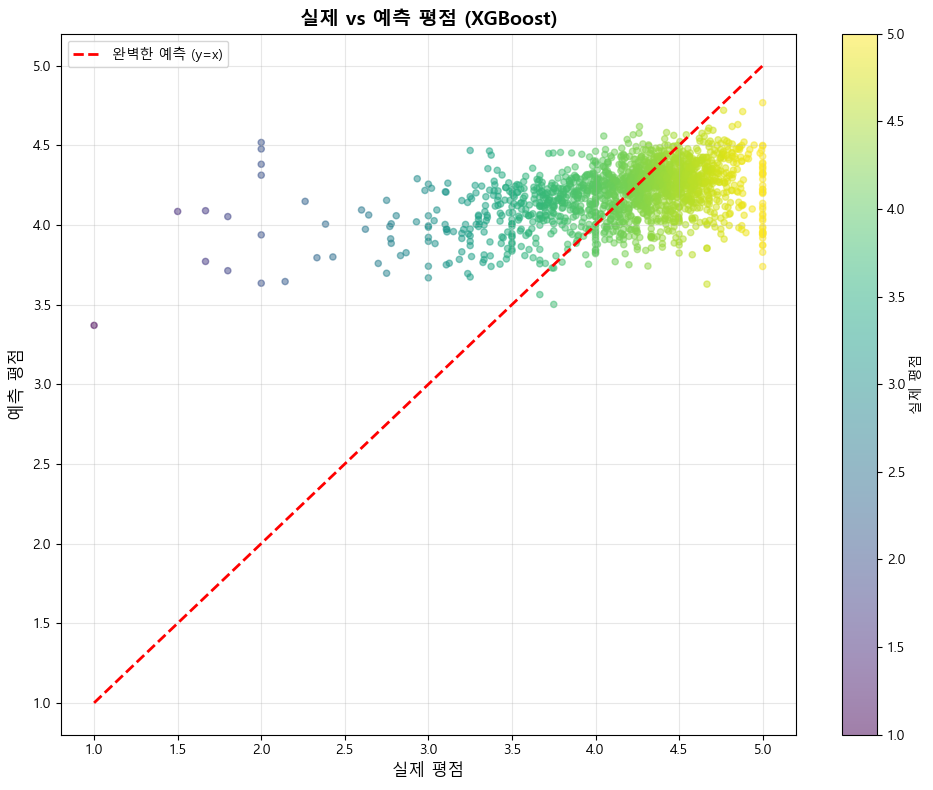


📊 그래프 해석:
   - 점들이 빨간 대각선에 가까울수록 예측이 정확합니다
   - 점들이 퍼져있을수록 예측 오차가 큽니다
   - 빨간선 위쪽: 과대 예측 (실제보다 높게 예측)
   - 빨간선 아래쪽: 과소 예측 (실제보다 낮게 예측)


In [23]:
# ============================================================
# 10-2. 실제 vs 예측 산점도
# ============================================================
# 완벽한 모델이라면 모든 점이 대각선 위에 있어야 함

plt.figure(figsize=(10, 8))

# 산점도 그리기
# x축: 실제 평점, y축: 예측 평점
plt.scatter(y_test, best_result['y_test_pred'], 
           alpha=0.5, 
           s=20,
           c=y_test,  # 실제 평점에 따라 색상 변화
           cmap='viridis')

# 완벽한 예측선 (y=x)
# 이 선 위에 있으면 예측이 완벽하다는 의미
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', 
         linewidth=2, 
         label='완벽한 예측 (y=x)')

plt.xlabel('실제 평점', fontsize=12)
plt.ylabel('예측 평점', fontsize=12)
plt.title(f'실제 vs 예측 평점 ({best_result["model_name"]})', fontsize=14, fontweight='bold')
plt.colorbar(label='실제 평점')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 그래프 해석:")
print("   - 점들이 빨간 대각선에 가까울수록 예측이 정확합니다")
print("   - 점들이 퍼져있을수록 예측 오차가 큽니다")
print("   - 빨간선 위쪽: 과대 예측 (실제보다 높게 예측)")
print("   - 빨간선 아래쪽: 과소 예측 (실제보다 낮게 예측)")

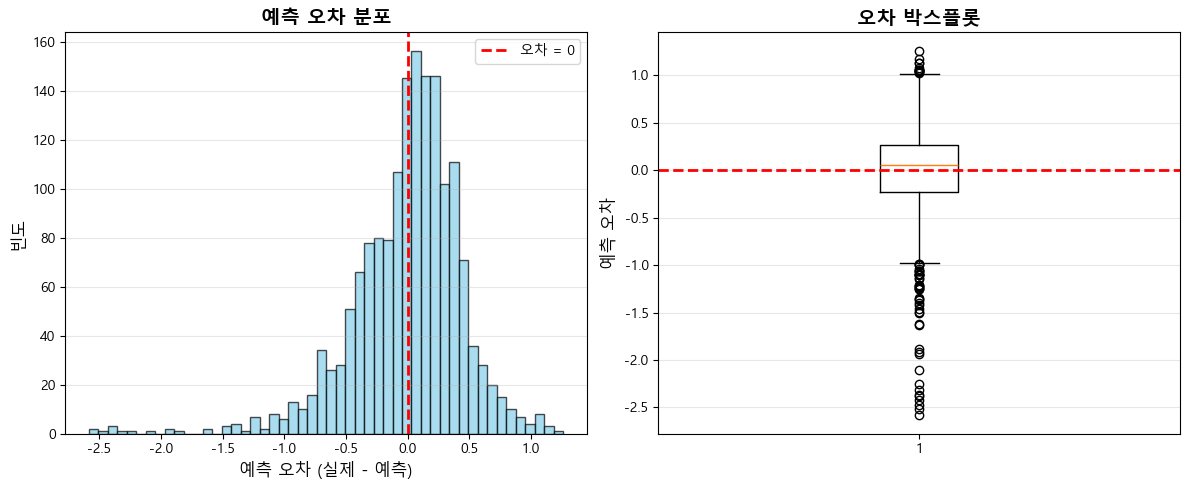


📊 오차 통계:
   평균 오차: -0.0062
   오차 표준편차: 0.4495
   최대 과대 예측: 1.2610 (실제보다 1.2610점 낮게 예측)
   최대 과소 예측: -2.5846 (실제보다 2.5846점 높게 예측)

💡 해석:
   - 오차가 0 근처에 집중되어 있으면 좋은 모델입니다
   - 평균 오차가 0에 가까우면 편향(bias)이 적습니다
   - 오차의 범위가 좁으면 일관성있는 예측을 합니다


In [24]:
# ============================================================
# 10-3. 예측 오차 분포
# ============================================================
# 오차 = 실제값 - 예측값
# 오차가 0에 가까울수록 좋음

# 오차 계산
errors = y_test - best_result['y_test_pred']

plt.figure(figsize=(12, 5))

# 왼쪽: 오차 히스토그램
plt.subplot(1, 2, 1)
plt.hist(errors, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='오차 = 0')
plt.xlabel('예측 오차 (실제 - 예측)', fontsize=12)
plt.ylabel('빈도', fontsize=12)
plt.title('예측 오차 분포', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# 오른쪽: 오차 박스플롯
plt.subplot(1, 2, 2)
plt.boxplot(errors, vert=True)
plt.ylabel('예측 오차', fontsize=12)
plt.title('오차 박스플롯', fontsize=14, fontweight='bold')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 오차 통계:")
print(f"   평균 오차: {errors.mean():.4f}")
print(f"   오차 표준편차: {errors.std():.4f}")
print(f"   최대 과대 예측: {errors.max():.4f} (실제보다 {errors.max():.4f}점 낮게 예측)")
print(f"   최대 과소 예측: {errors.min():.4f} (실제보다 {abs(errors.min()):.4f}점 높게 예측)")

print("\n💡 해석:")
print("   - 오차가 0 근처에 집중되어 있으면 좋은 모델입니다")
print("   - 평균 오차가 0에 가까우면 편향(bias)이 적습니다")
print("   - 오차의 범위가 좁으면 일관성있는 예측을 합니다")

In [25]:
# ============================================================
# 10-4. 샘플 예측 결과 확인
# ============================================================
# 실제 몇 개 제품의 예측을 직접 확인해봅니다

print("🔍 샘플 예측 결과 (무작위 10개):")
print("="*80)

# 무작위로 10개 선택
sample_indices = np.random.choice(len(y_test), size=min(10, len(y_test)), replace=False)

# 결과를 데이터프레임으로 정리
sample_results = pd.DataFrame({
    '실제 평점': y_test.iloc[sample_indices].values,
    '예측 평점': best_result['y_test_pred'][sample_indices],
    '오차': y_test.iloc[sample_indices].values - best_result['y_test_pred'][sample_indices]
})

# 소수점 4자리로 반올림
sample_results = sample_results.round(4)

# 절댓값 오차 추가
sample_results['절대 오차'] = sample_results['오차'].abs()

print(sample_results.to_string(index=False))

print("\n" + "="*80)
print(f"평균 절대 오차: {sample_results['절대 오차'].mean():.4f}점")

🔍 샘플 예측 결과 (무작위 10개):
 실제 평점  예측 평점      오차  절대 오차
4.0598 4.4737 -0.4139 0.4139
3.3061 4.0067 -0.7006 0.7006
4.8615 4.4727  0.3888 0.3888
3.8684 3.9895 -0.1211 0.1211
4.5430 4.5660 -0.0230 0.0230
4.6467 4.2605  0.3862 0.3862
4.5046 4.3612  0.1434 0.1434
4.1811 4.1918 -0.0107 0.0107
4.2628 4.6181 -0.3553 0.3553
2.0000 3.6343 -1.6343 1.6343

평균 절대 오차: 0.4177점


---
## 11. 특성 중요도 분석

### 특성 중요도(Feature Importance)란?
- 각 특성이 예측에 얼마나 중요한지를 나타냅니다
- 어떤 요소가 평점에 가장 큰 영향을 주는지 알 수 있습니다

### 활용:
- 중요한 특성에 집중할 수 있습니다
- 중요하지 않은 특성은 제거하여 모델을 단순화할 수 있습니다
- 비즈니스 의사결정에 도움을 줍니다

### 주의:
- 선형 회귀는 계수(coefficient)로 중요도를 판단합니다
- 트리 기반 모델은 feature_importances_로 중요도를 계산합니다

📊 특성 중요도 분석

특성 중요도: 각 특성이 예측에 얼마나 영향을 주는지를 0~1 사이 값으로 표현
(높을수록 중요함)

                특성      중요도
           reviews 0.190034
         price_usd 0.164113
  primary_category 0.128136
       loves_count 0.127193
secondary_category 0.113178
  popularity_score 0.112988
  ingredient_count 0.087049
        brand_name 0.077309


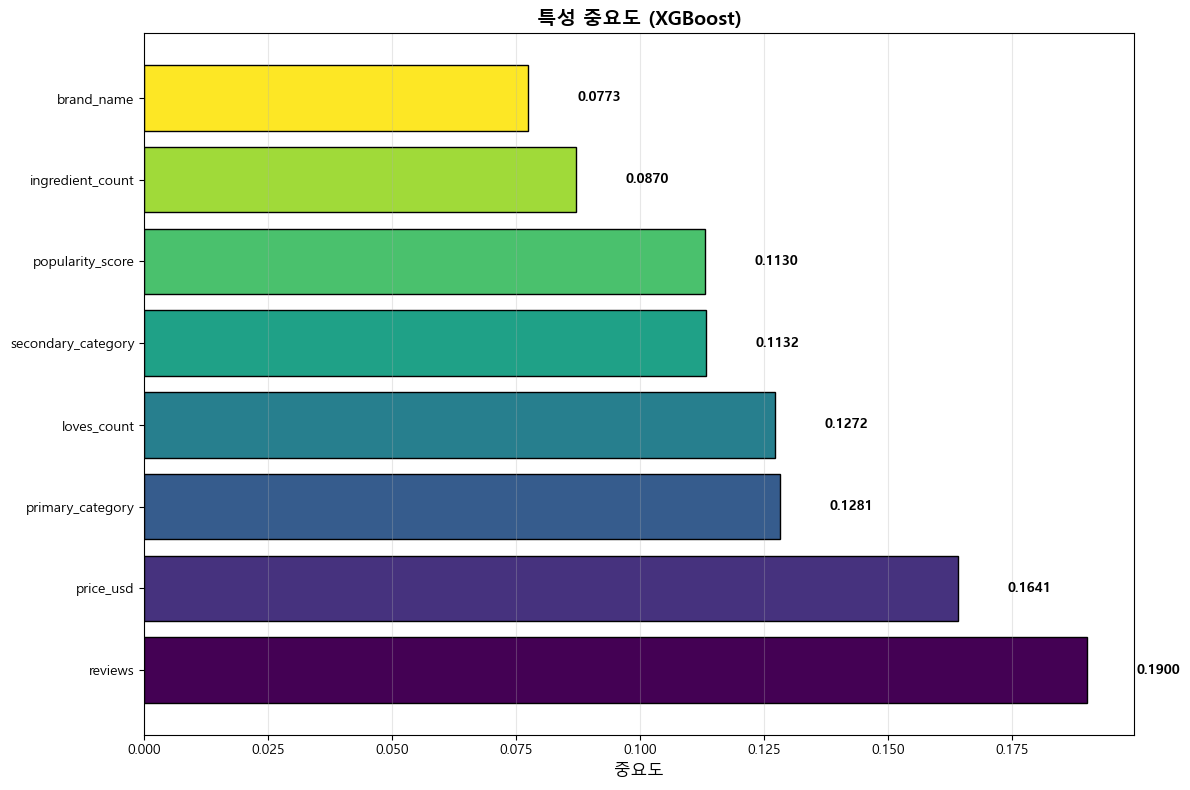


🏆 가장 중요한 특성 TOP 3:
   1. reviews: 0.1900
   2. price_usd: 0.1641
   3. primary_category: 0.1281

💡 해석:
   - 중요도가 높은 특성이 평점 예측에 큰 영향을 줍니다
   - 이 정보로 어떤 요소가 제품 평점에 중요한지 알 수 있습니다
   - 중요하지 않은 특성은 제거하여 모델을 단순화할 수 있습니다


In [26]:
# ============================================================
# 11-1. 특성 중요도 추출 및 시각화
# ============================================================

# 최고 성능 모델이 트리 기반 모델인지 확인
# 트리 기반 모델: RandomForest, GradientBoosting, XGBoost
if hasattr(best_result['model'], 'feature_importances_'):
    print("📊 특성 중요도 분석\n")
    print("특성 중요도: 각 특성이 예측에 얼마나 영향을 주는지를 0~1 사이 값으로 표현")
    print("(높을수록 중요함)\n")
    print("="*80)
    
    # 특성 중요도 추출
    importances = best_result['model'].feature_importances_
    
    # 특성 이름과 중요도를 데이터프레임으로 정리
    feature_importance = pd.DataFrame({
        '특성': X.columns,
        '중요도': importances
    })
    
    # 중요도 순으로 정렬
    feature_importance = feature_importance.sort_values('중요도', ascending=False)
    
    # 표로 출력
    print(feature_importance.to_string(index=False))
    
    # 시각화
    plt.figure(figsize=(12, 8))
    
    # 가로 막대 그래프
    colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))
    bars = plt.barh(range(len(feature_importance)), 
                    feature_importance['중요도'],
                    color=colors,
                    edgecolor='black')
    
    plt.yticks(range(len(feature_importance)), feature_importance['특성'])
    plt.xlabel('중요도', fontsize=12)
    plt.title(f'특성 중요도 ({best_result["model_name"]})', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # 각 막대 끝에 중요도 값 표시
    for i, (importance, feature) in enumerate(zip(feature_importance['중요도'], feature_importance['특성'])):
        plt.text(importance + 0.01, i, f'{importance:.4f}', 
                va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # 상위 3개 특성 출력
    print("\n" + "="*80)
    print("🏆 가장 중요한 특성 TOP 3:")
    for i, row in feature_importance.head(3).iterrows():
        print(f"   {list(feature_importance.head(3).index).index(i)+1}. {row['특성']}: {row['중요도']:.4f}")
    
    print("\n💡 해석:")
    print("   - 중요도가 높은 특성이 평점 예측에 큰 영향을 줍니다")
    print("   - 이 정보로 어떤 요소가 제품 평점에 중요한지 알 수 있습니다")
    print("   - 중요하지 않은 특성은 제거하여 모델을 단순화할 수 있습니다")

else:
    print("⚠️ 선택된 모델은 특성 중요도를 제공하지 않습니다.")
    print("   (선형 회귀는 계수(coefficient)로 중요도를 판단합니다)")

---
## 12. 학습 요약 및 결론

In [27]:
# ============================================================
# 12. 최종 요약
# ============================================================

print("\n" + "#"*80)
print("# 🎓 제품 평점 예측 모델 - 최종 요약")
print("#"*80)

print("\n📊 프로젝트 개요:")
print("="*80)
print(f"데이터 크기: {len(data):,}개 제품")
print(f"학습 데이터: {len(X_train):,}개 ({len(X_train)/len(data)*100:.1f}%)")
print(f"테스트 데이터: {len(X_test):,}개 ({len(X_test)/len(data)*100:.1f}%)")
print(f"사용된 특성: {X.shape[1]}개")

print("\n🏆 최고 성능 모델:")
print("="*80)
print(f"모델: {best_result['model_name']}")
print(f"Test MAE: {best_result['test_mae']:.4f} (평균 {best_result['test_mae']:.4f}점 오차)")
print(f"Test RMSE: {best_result['test_rmse']:.4f}")
print(f"Test R²: {best_result['test_r2']:.4f} ({best_result['test_r2']*100:.2f}% 설명력)")

print("\n💡 배운 내용:")
print("="*80)
print("1. 회귀(Regression) 문제의 이해")
print("   - 연속된 숫자 값을 예측하는 머신러닝 기법")
print("   - 분류와의 차이: 카테고리 vs 숫자")

print("\n2. 데이터 전처리")
print("   - 범주형 변수를 숫자로 변환 (Label Encoding)")
print("   - 특성 스케일링 (StandardScaler)")
print("   - 학습/테스트 데이터 분할의 중요성")

print("\n3. 여러 모델 비교")
print("   - 선형 회귀: 기본적이지만 해석하기 쉬움")
print("   - 랜덤 포레스트: 복잡한 패턴 학습 가능")
print("   - 그래디언트 부스팅: 고성능")
print("   - XGBoost: 최고 성능")

print("\n4. 모델 평가")
print("   - MAE: 평균 절대 오차")
print("   - RMSE: 평균 제곱근 오차")
print("   - R²: 설명력 (얼마나 잘 설명하는지)")

print("\n5. 특성 중요도")
print("   - 어떤 특성이 예측에 중요한지 파악")
print("   - 비즈니스 의사결정에 활용 가능")

print("\n" + "#"*80)
print("# 🎯 다음 단계")
print("#"*80)
print("\n다음 노트북에서 계속:")
print("  - 04_ml_sentiment_analysis.ipynb: 리뷰 텍스트로 감성 분석")
print("  - 05_ml_recommendation_system.ipynb: 제품 추천 시스템")
print("  - 06_ml_review_helpfulness.ipynb: 리뷰 유용성 예측")

print("\n" + "="*80)
print("✅ 노트북 완료!")
print("="*80)


################################################################################
# 🎓 제품 평점 예측 모델 - 최종 요약
################################################################################

📊 프로젝트 개요:
데이터 크기: 8,209개 제품
학습 데이터: 6,567개 (80.0%)
테스트 데이터: 1,642개 (20.0%)
사용된 특성: 8개

🏆 최고 성능 모델:
모델: XGBoost
Test MAE: 0.3257 (평균 0.3257점 오차)
Test RMSE: 0.4494
Test R²: 0.1705 (17.05% 설명력)

💡 배운 내용:
1. 회귀(Regression) 문제의 이해
   - 연속된 숫자 값을 예측하는 머신러닝 기법
   - 분류와의 차이: 카테고리 vs 숫자

2. 데이터 전처리
   - 범주형 변수를 숫자로 변환 (Label Encoding)
   - 특성 스케일링 (StandardScaler)
   - 학습/테스트 데이터 분할의 중요성

3. 여러 모델 비교
   - 선형 회귀: 기본적이지만 해석하기 쉬움
   - 랜덤 포레스트: 복잡한 패턴 학습 가능
   - 그래디언트 부스팅: 고성능
   - XGBoost: 최고 성능

4. 모델 평가
   - MAE: 평균 절대 오차
   - RMSE: 평균 제곱근 오차
   - R²: 설명력 (얼마나 잘 설명하는지)

5. 특성 중요도
   - 어떤 특성이 예측에 중요한지 파악
   - 비즈니스 의사결정에 활용 가능

################################################################################
# 🎯 다음 단계
################################################################################

다음 노트북에서 계속:
 